In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
stars = pd.read_csv('/home/brady/Documents/class/2018f/SPS/Python/code-talk-3/demo.csv')

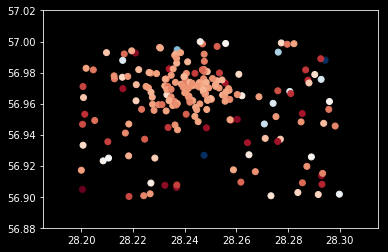

In [3]:
plt.style.use('dark_background')

plt.scatter(stars['ra'],
            stars['dec'],
            c=stars['T'],
            cmap=plt.get_cmap('RdBu'))

(array([ 1.,  0.,  5.,  4.,  2.,  2.,  4.,  7.,  3.,  2.,  6., 11., 14.,
        25., 35., 29., 12.,  6.,  3.,  5.,  4.,  1.,  2.,  3.,  3.,  1.,
         1.,  0.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 2896.14536882,  3073.65492092,  3251.16447303,  3428.67402514,
         3606.18357724,  3783.69312935,  3961.20268145,  4138.71223356,
         4316.22178566,  4493.73133777,  4671.24088988,  4848.75044198,
         5026.25999409,  5203.76954619,  5381.2790983 ,  5558.7886504 ,
         5736.29820251,  5913.80775462,  6091.31730672,  6268.82685883,
         6446.33641093,  6623.84596304,  6801.35551514,  6978.86506725,
         7156.37461936,  7333.88417146,  7511.39372357,  7688.90327567,
         7866.41282778,  8043.92237988,  8221.43193199,  8398.9414841 ,
         8576.4510362 ,  8753.96058831,  8931.47014041,  9108.97969252,
         9286.48924462,  9463.99879673,  9641.50834884,  9819.017900

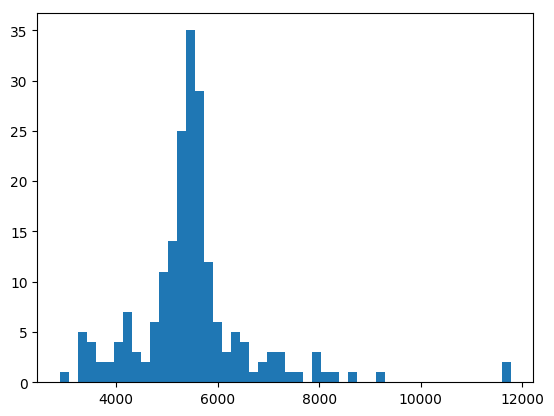

In [66]:
plt.style.use('default')
plt.hist(stars['T'], bins=50)

In [4]:
in_cluster = ((stars['ra'] - 28.24)**2 + (stars['dec'] - 56.97)**2) < .02**2

In [6]:
cluster = stars[in_cluster]

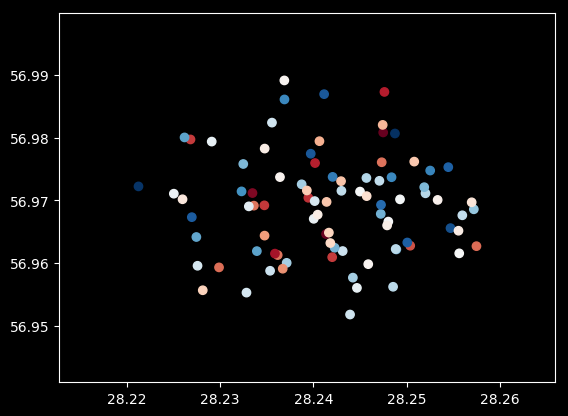

In [13]:
plt.style.use('dark_background')

plt.scatter(cluster['ra'],
            cluster['dec'],
            c=cluster['T'],
            cmap=plt.get_cmap('RdBu'))

(array([ 3.,  1.,  5.,  2.,  5.,  2.,  2.,  6.,  4.,  8.,  8.,  5., 10.,
         4.,  5.,  4.,  4.,  1.,  6.,  2.]),
 array([5015.26366709, 5060.26550049, 5105.26733389, 5150.26916728,
        5195.27100068, 5240.27283408, 5285.27466747, 5330.27650087,
        5375.27833427, 5420.28016766, 5465.28200106, 5510.28383446,
        5555.28566785, 5600.28750125, 5645.28933465, 5690.29116805,
        5735.29300144, 5780.29483484, 5825.29666824, 5870.29850163,
        5915.30033503]),
 <a list of 20 Patch objects>)

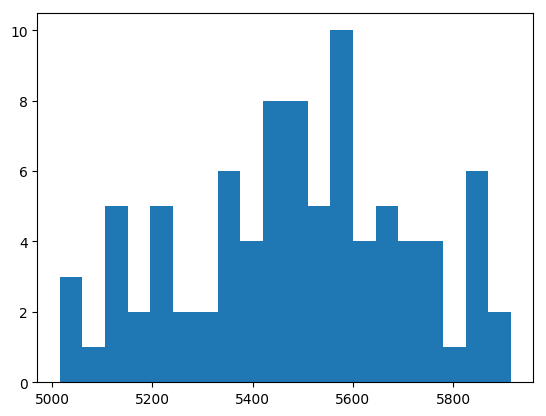

In [67]:
plt.style.use('default')
plt.hist(cluster['T'], bins=20)

In [12]:
cluster = cluster[(cluster['T'] > 5000) & (cluster['T'] < 6000)]
# Rerun above

In [32]:
average = cluster['T'].mean()
sd = np.std(cluster['T'])

/home/brady/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


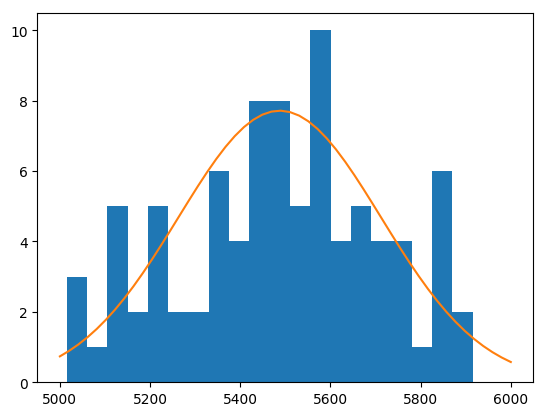

In [58]:
import matplotlib.mlab as mlab

plt.style.use('default')
plt.hist(cluster['T'], bins=20)

t = np.linspace(5000, 6000)
plt.plot(t, mlab.normpdf(t, average, sd)*87*1000/20)

/home/brady/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


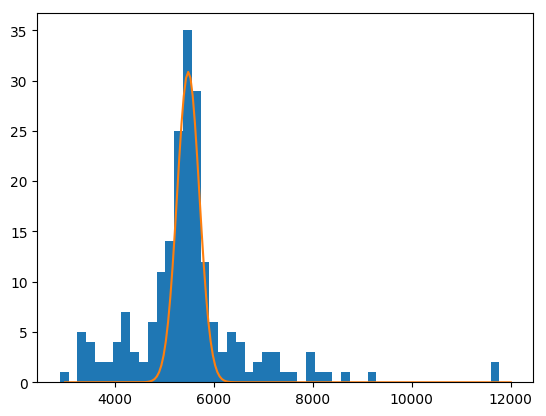

In [64]:
plt.style.use('default')
plt.hist(stars['T'], bins=50)

t = np.linspace(3000, 12000, 200)
plt.plot(t, mlab.normpdf(t, average, sd)*87*1000/50*10)

In [77]:
x = cluster['ra'].median()
sd_x = cluster['ra'].std()

y = cluster['dec'].median()
sd_y = cluster['dec'].std()

r = np.sqrt( sd_x**2 + sd_y**2 )


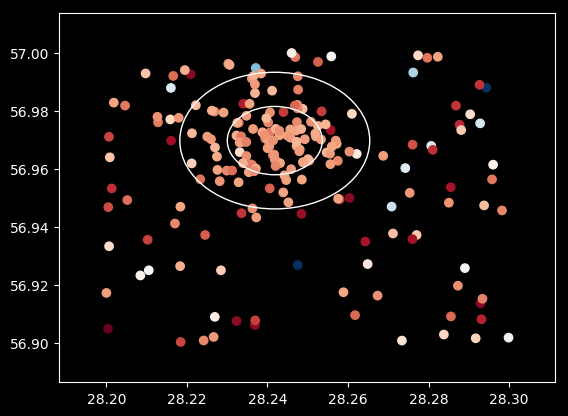

In [86]:
plt.style.use('dark_background')

plt.scatter(stars['ra'],
            stars['dec'],
            c=stars['T'],
            cmap=plt.get_cmap('RdBu'))

sigma_1 = plt.Circle((x, y), r, color='w', fill=False)
sigma_2 = plt.Circle((x, y), 2*r, color='w', fill=False)

plt.gcf().gca().add_artist(sigma_1)
plt.gcf().gca().add_artist(sigma_2)